In [2]:
import numpy as np
import control
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import scipy

import sys
sys.path.append('../')
from control_utils import *

import numpy as np

# C2D

In [15]:
n = 1;
d = [1,1];
Gs = control.tf(n,d);

T = 1
Gz = control.c2d(Gs, T, method='impulse')

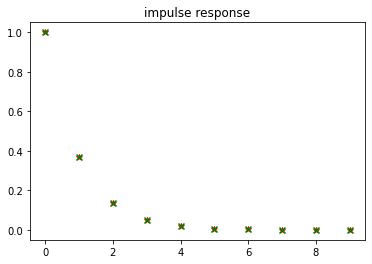

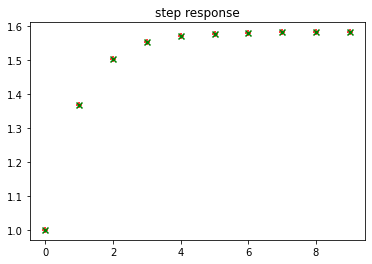

In [16]:
t = np.linspace(0, 10, 999)
#x, y = control.impulse_response(Gs, t);
#plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.impulse_response(Gz, kT);
plt.scatter(xz, yz, marker='*', color='red')
plt.title('impulse response')

x = np.zeros(len(xz))
x[0] = 1
n_z = Gz.num[0][0]
d_z = Gz.den[0][0]
#y = scipy.signal.lfilter([0 , n_z[0]], d_z, x)
#y = scipy.signal.lfilter([n_z[0]], d_z, x)
y, _, _ = control.matlab.lsim(Gz, x, kT);

plt.scatter(xz, y, marker='x', color='green')

############################

plt.figure()
t = np.linspace(0, 10, 999)
#x, y = control.step_response(Gs, t);
#plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.step_response(Gz, kT);
plt.scatter(xz, yz, marker='+', color='red')
plt.title('step response')

x = np.ones(len(xz))
n_z = Gz.num[0][0]
d_z = Gz.den[0][0]
#y = scipy.signal.lfilter([0 , n_z[0]], d_z, x)
#y = scipy.signal.lfilter([n_z[0]], d_z, x)
y, _, _ = control.matlab.lsim(Gz, x, kT);
plt.scatter(xz, y, marker='x', color='green')

# Resíduos

In [5]:
a = 1
b = 3
Gs = control.tf(1, [1, a+b, a*b])

print("Given the function:")
display(Markdown(Gs._repr_latex_()))

print("Transforming to G(z), we'll have:")
Gz_formatted, Gz = tf_residue_method(Gs)
display(Markdown('$$' + Gz_formatted + '$$'))

print("That is equal to:")
display(Markdown(Gz._repr_latex_()))


Given the function:


$$\frac{1}{s^2 + 4 s + 3}$$

Transforming to G(z), we'll have:


$$\frac{-0.5 z}{z - 0.04979} + \frac{0.5 z}{z - 0.3679}$$

That is equal to:


$$\frac{0.159 z}{z^2 - 0.4177 z + 0.01832}\quad dt = 1$$

/usr/local/lib/python3.8/dist-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


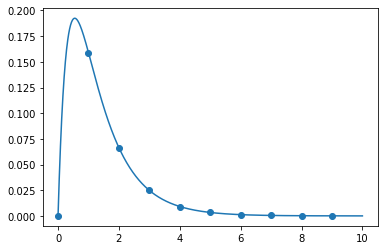

In [6]:
t = np.linspace(0, 10, 999)
x, y = control.impulse_response(Gs, t);
plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.impulse_response(Gz, kT);
plt.scatter(xz, yz)

/usr/local/lib/python3.8/dist-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


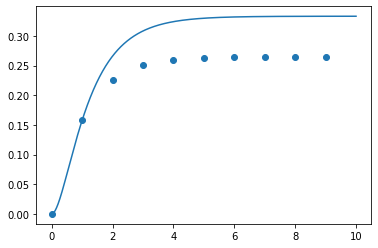

In [7]:
t = np.linspace(0, 10, 999)
x, y = control.step_response(Gs, t);
plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.step_response(Gz, kT);
plt.scatter(xz, yz)

# Ex 1

![](ex01.jpg)

In [67]:
T = 1

In [68]:
Gs1 = control.tf(1, [1, 3])

print("Given the function:")
display(Markdown(Gs1._repr_latex_()))

print("Transforming to G(z), we'll have:")
Gz1_formatted, Gz1 = tf_residue_method(Gs1)
display(Markdown(Gz1._repr_latex_()))

print("Which by the way is the same as C2D:")
control.c2d(Gs1, T, method='impulse') # como a conversão não possui ZOH, o resultado correto é com 

Given the function:


$$\frac{1}{s + 3}$$

Transforming to G(z), we'll have:


$$\frac{z}{z - 0.04979}\quad dt = 1$$

Which by the way is the same as C2D:


TransferFunction(array([1., 0.]), array([ 1.        , -0.04978707]), 1)

In [69]:
Gs2 = control.tf(1, [1, 5])

print("Given the function:")
display(Markdown(Gs2._repr_latex_()))

print("Transforming to G(z), we'll have:")
Gz2_formatted, Gz2 = tf_residue_method(Gs2)
display(Markdown(Gz2._repr_latex_()))

print("Which by the way is the same as C2D:")
control.c2d(Gs2, T, method='impulse') # como a conversão não possui ZOH, o resultado correto é com 

Given the function:


$$\frac{1}{s + 5}$$

Transforming to G(z), we'll have:


$$\frac{z}{z - 0.006738}\quad dt = 1$$

Which by the way is the same as C2D:


TransferFunction(array([1., 0.]), array([ 1.        , -0.00673795]), 1)

In [70]:
Gs = Gs1*Gs2
Gz = Gz1*Gz2

/usr/local/lib/python3.8/dist-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)
/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


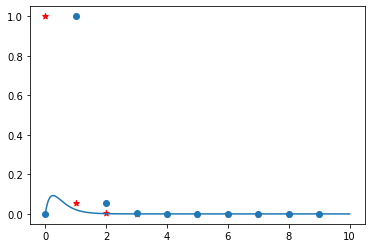

In [90]:
t = np.linspace(0, 10, 999)
x, y = control.impulse_response(Gs, t);
plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.impulse_response(Gz, kT);
plt.scatter(xz, yz, marker='*', color='red')

x = np.zeros(len(xz))
x[0] = 1
n_z = Gz.num[0][0]
d_z = Gz.den[0][0]
y = scipy.signal.lfilter([0 , n_z[0], n_z[1]], d_z, x)
plt.scatter(xz, y)

/usr/local/lib/python3.8/dist-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)
/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


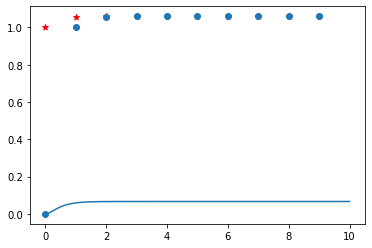

In [88]:
t = np.linspace(0, 10, 999)
x, y = control.step_response(Gs, t);
plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.step_response(Gz, kT);
plt.scatter(xz, yz, marker='*', color='red')

x = np.ones(len(xz))
n_z = Gz.num[0][0]
d_z = Gz.den[0][0]
y = scipy.signal.lfilter([0 , n_z[0], n_z[1]], d_z, x)
plt.scatter(xz, y)

# Ex 2

![](ex02.jpg)

In [41]:
T=2

In [48]:
Gs1 = control.tf(1, [1, 3])
control.c2d(Gs1, Ts=T, method='zoh')

TransferFunction(array([0.33250708]), array([ 1.        , -0.00247875]), 2)

In [49]:
Gs1 = control.tf(1, [1, 3])
control.c2d(Gs1, Ts=T, method='zoh')


# Source: https://www.mathworks.com/matlabcentral/answers/604726-c2d-function-zoh-method-formula
Gz1 = control.minreal(control.c2d(Gs1*control.tf(1, [1, 0]), T, 'impulse')*control.tf([1, -1], [1, 0], T)/T)

2 states have been removed from the model


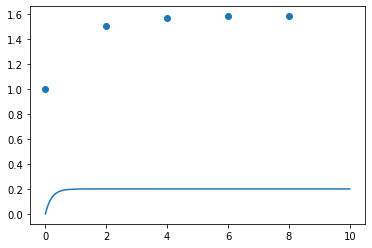

In [50]:
Gs = Gs1
Gs = Gs2

t = np.linspace(0, 10, 999)
x, y = control.step_response(Gs, t);
plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.step_response(Gz, kT);
plt.scatter(xz, yz)

# Ex 3

![](ex03.jpg)

# Ex ?

In [53]:
Gs = control.tf([1], [1,1])
Gs

TransferFunction(array([1]), array([1, 1]))

In [54]:
T = 1
Gz = control.tf([1, 0], [1, -0.3679], T)
Gz

TransferFunction(array([1, 0]), array([ 1.    , -0.3679]), 1)

Text(0.5, 1.0, 'step response')

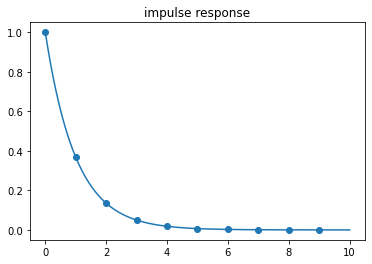

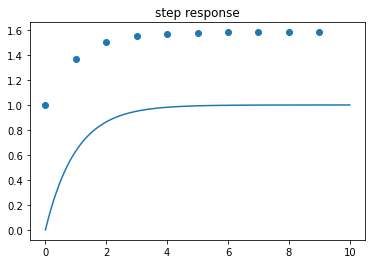

In [55]:
t = np.linspace(0, 10, 999)
x, y = control.impulse_response(Gs, t);
plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.impulse_response(Gz, kT);
plt.scatter(xz, yz)
plt.title('impulse response')

plt.figure()
t = np.linspace(0, 10, 999)
x, y = control.step_response(Gs, t);
plt.plot(x, y)

kT = np.arange(0, 10, T)
xz, yz = control.step_response(Gz, kT);
plt.scatter(xz, yz)
plt.title('step response')